1. Input data

2. Linear combination (W*x + b)

3. Activation function (sigmoid)

4. Loss funtion (MSE)

5. Optimization (gradient descent)

6. Prediction

# Class Logit_gate

Class Logit_gate():  

1. weight_init  
2. linear_combilinear_combination  
  a. forpass  
  b. backprop  
3. activation_function * sigmoid    
  a. sigmoid  
4. loss_function * MSE    
5. optimaiztion * gradient descent    
6. fit    
7. prediction    

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(a):
    return 1 / (1 + np.exp(-a))



class Logit_gate():
    def __init__(self, learning_rate = 1e-1, activation = 'sigmoid', loss = 'MSE', opt = 'gradient', epochs = 1000) -> None:
        def weight_init():
            W = np.random.randn(2, 1)
            b = np.random.randn(1)

            return W, b
        
        self.W, self.b = weight_init()
        self.lr = learning_rate
        self.act_f = activation
        self.loss_f = loss
        self.opt = opt
        self.epochs = epochs


    def forpass(self, x):
        return self.activation_funtion(self.linear_combination(x))


    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m
        b_grad = np.sum(err) / m
        return w_grad, b_grad


    def linear_combination(self, X):
        a = np.dot(X, self.W) + self.b
        return a


    def activation_funtion(self, a): # sigmoid
        if self.act_f == 'sigmoid':
            return sigmoid(a)


    def loss_funtion(self, x, y): # MSE
        if self.loss_f == 'MSE':
            return 0.5 * np.mean(np.sum((y - self.forpass(x))**2))


    def optimization(self, x, y): # gradient descent
        if self.opt == 'gradient':
            loss_history = []
            for i in range(self.epochs):
                loss = self.loss_funtion(x, y)
                loss_history.append(loss)
                if i%100==0:
                    print(f"epoch: {i} Loss: {loss:.8f}")
                err = -(y - self.forpass(x))
                w_gard, b_gard = self.backprop(x, err)
                self.W -= w_gard * self.lr
                self.b -= b_gard * self.lr

        plt.title('Loss history')
        plt.plot(list(range(len(loss_history))),loss_history)


    def fit(self, X, y):
        self.optimization(X, y)
    

    def prediction(self, X):
        return self.activation_funtion(np.dot(X, self.W) + self.b)

epoch: 0 Loss: 0.72107576
epoch: 100 Loss: 0.36018688
epoch: 200 Loss: 0.25183511
epoch: 300 Loss: 0.17322443
epoch: 400 Loss: 0.12269696
epoch: 500 Loss: 0.09023105
epoch: 600 Loss: 0.06859593
epoch: 700 Loss: 0.05360849
epoch: 800 Loss: 0.04286782
epoch: 900 Loss: 0.03494611


array([[0.21132498],
       [0.92129238],
       [0.91597245],
       [0.99790444]])

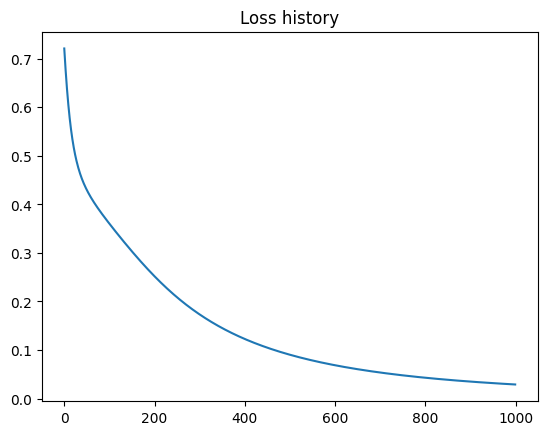

In [2]:
OR = Logit_gate()

x_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([[0], [1], [1], [1]])

OR.fit(x_or, y_or)

OR.prediction(x_or)

epoch: 0 Loss: 0.51152805
epoch: 100 Loss: 0.16752521
epoch: 200 Loss: 0.12480494
epoch: 300 Loss: 0.09861872
epoch: 400 Loss: 0.08098608
epoch: 500 Loss: 0.06813453
epoch: 600 Loss: 0.05827254
epoch: 700 Loss: 0.05045094
epoch: 800 Loss: 0.04410718
epoch: 900 Loss: 0.03887710


array([[0.00517184],
       [0.12854665],
       [0.13355553],
       [0.81390559]])

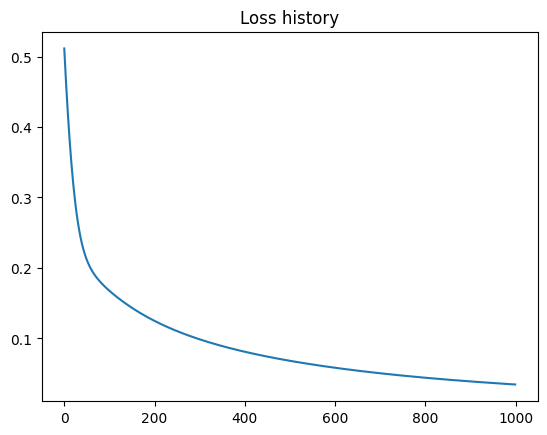

In [3]:
AND = Logit_gate()

x_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([[0], [0], [0], [1]])

AND.fit(x_and, y_and)

AND.prediction(x_and)

epoch: 0 Loss: 0.58043049
epoch: 100 Loss: 0.14668180
epoch: 200 Loss: 0.10858614
epoch: 300 Loss: 0.08145456
epoch: 400 Loss: 0.06259965
epoch: 500 Loss: 0.04931315
epoch: 600 Loss: 0.03969507
epoch: 700 Loss: 0.03254608
epoch: 800 Loss: 0.02710681
epoch: 900 Loss: 0.02288377


array([[0.82683923],
       [0.06994646],
       [0.06492602],
       [0.00109241]])

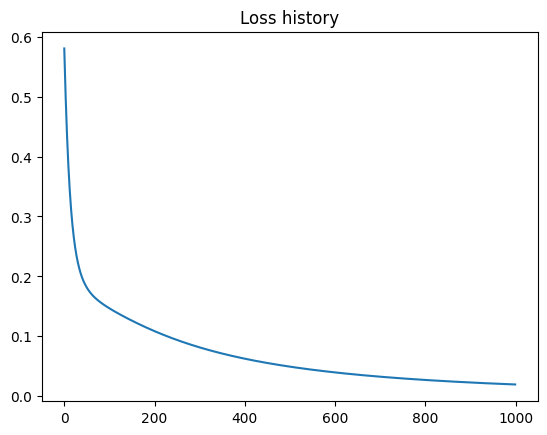

In [4]:
NOR = Logit_gate()

x_nor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_nor = np.array([[1], [0], [0], [0]])

NOR.fit(x_nor, y_nor)

NOR.prediction(x_nor)

epoch: 0 Loss: 0.44414351
epoch: 100 Loss: 0.17449101
epoch: 200 Loss: 0.13642711
epoch: 300 Loss: 0.10986654
epoch: 400 Loss: 0.09060499
epoch: 500 Loss: 0.07606159
epoch: 600 Loss: 0.06475463
epoch: 700 Loss: 0.05576824
epoch: 800 Loss: 0.04850062
epoch: 900 Loss: 0.04253817


array([[0.99398988],
       [0.86366083],
       [0.8629893 ],
       [0.19436314]])

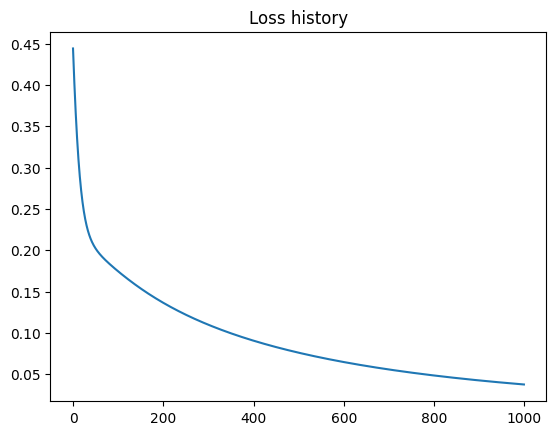

In [5]:
NAND = Logit_gate()

x_nand = np.array([[0,0], [0,1], [1,0], [1,1]])
y_nand = np.array([[1], [1], [1], [0]])

NAND.fit(x_nand, y_nand)

NAND.prediction(x_nand)

In [6]:
# XOR gate

x = np.array([[0,0], [0,1], [1,0], [1,1]])

x_by_nand = NAND.prediction(x)
x_by_or = OR.prediction(x)

# x_xor = np.concatenate((x_by_nand, x_by_or), axis=1).reshape(4,2)
x_xor = np.array([x_by_nand, x_by_or]).T.reshape(-1, 2)

AND.prediction(x_xor)

array([[0.23446473],
       [0.67921356],
       [0.67482418],
       [0.22061348]])